In [1]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end= '2023-06-30')

    return(raw
           .iloc[:, ::2]
           .pipe(fix_cols)
    )

raw = tweak_data()
raw

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507525,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404013,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434674,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2023-06-23,186.679993,186.679993,187.559998,185.009995,185.550003,53079300
2023-06-26,185.270004,185.270004,188.050003,185.229996,186.830002,48088700
2023-06-27,188.059998,188.059998,188.389999,185.669998,185.889999,50730800


<Axes: xlabel='Date'>

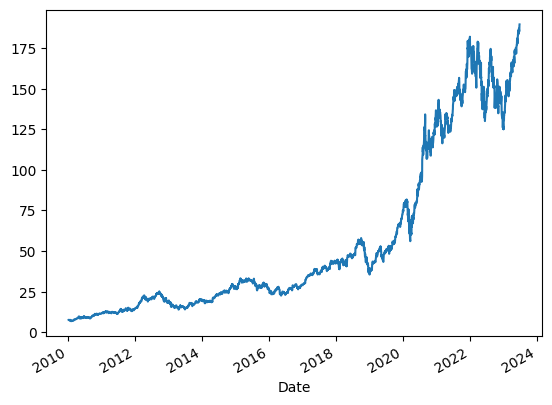

In [4]:
(raw
  .Close
  .plot()
 )

In [6]:
(raw
 .Close
)

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2023-06-23    186.679993
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
Name: Close, Length: 3395, dtype: float64

In [8]:
(raw
 .resample('M') #offset alias
)

In [9]:
(raw
 .resample('M')
 .Close
 )

In [15]:
# we have to call an aggregation method
# each of the Closing price is the mean of the closing prices that month
(raw
 .resample('M')
 .Close
 .mean()
 )

Date
2010-01-31      7.418402
2010-02-28      7.099850
2010-03-31      7.978960
2010-04-30      8.969592
2010-05-31      8.980768
                 ...    
2023-02-28    150.968421
2023-03-31    154.964782
2023-04-30    165.045790
2023-05-31    172.622728
2023-06-30    183.799000
Freq: M, Name: Close, Length: 162, dtype: float64

In [12]:
#for every 2 months
(raw
 .resample('2M')
 .Close
 .mean()
 )

Date
2010-01-31      7.418402
2010-03-31      7.581267
2010-05-31      8.975044
2010-07-31      9.218563
2010-09-30      9.368754
                 ...    
2022-11-30    145.428332
2023-01-31    136.853414
2023-03-31    153.156904
2023-05-31    169.111464
2023-07-31    183.799000
Freq: 2M, Name: Close, Length: 82, dtype: float64

<Axes: xlabel='Date'>

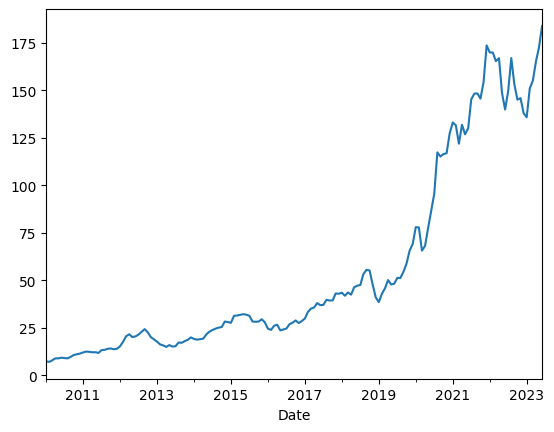

In [14]:
(raw
 .resample('M')
 .Close
 .mean()
 .plot()
 )